In [35]:
import os
import skimage
import matplotlib.pyplot as plt

In [22]:
def load_ml_data(data_directory):
    dirs = os.listdir(data_directory)
    images = []
    labels = []
    for d in dirs:
        relative_path = os.path.join(data_directory, d)
        file_names = [
            os.path.join(relative_path, f)
            for f in os.listdir(relative_path)
            if f.endswith('.ppm')
        ]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

In [24]:
X, y = load_ml_data('./Training')

In [25]:
len(X)

4575

In [28]:
X[0].shape

(144, 141, 3)

In [29]:
X[0][0][0]

array([47, 52, 59], dtype=uint8)

In [31]:
import random 

In [33]:
rand_signs = random.sample(range(0, len(y)), 6)

In [34]:
rand_signs


[4263, 4544, 1353, 1754, 3346, 3550]

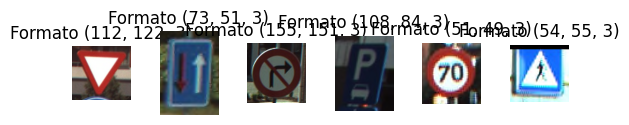

In [37]:
for i in range(len(rand_signs)):
    plt.subplot(1,6, i+1)
    plt.axis('off')
    plt.imshow(X[rand_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.title(
        "Formato {}".format(X[rand_signs[i]].shape)
    )

In [38]:
# las imágenes no son del mismo tamaño

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,   0.,
         43., 375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63.,
        316.,  12.,  46.,  60.,  18.,  98., 285., 196., 242.,   0., 148.,
         35.,  30.,  48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27.,
        199., 118.,  12.,  95.,  78.,  15.,  42.,   9., 282.]),
 array([ 0.      ,  0.953125,  1.90625 ,  2.859375,  3.8125  ,  4.765625,
         5.71875 ,  6.671875,  7.625   ,  8.578125,  9.53125 , 10.484375,
        11.4375  , 12.390625, 13.34375 , 14.296875, 15.25    , 16.203125,
        17.15625 , 18.109375, 19.0625  , 20.015625, 20.96875 , 21.921875,
        22.875   , 23.828125, 24.78125 , 25.734375, 26.6875  , 27.640625,
        28.59375 , 29.546875, 30.5     , 31.453125, 32.40625 , 33.359375,
        34.3125  , 35.265625, 36.21875 , 37.171875, 38.125   , 39.078125,
        40.03125 , 40.984375, 41.9375  , 42.8906

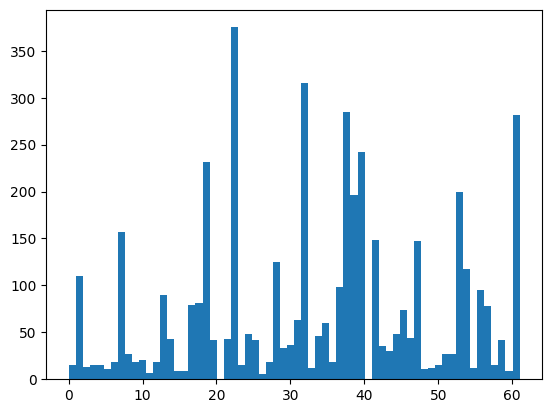

In [40]:
plt.hist(y, 64)

In [48]:
# la distribución no es uniforme, tenemos muchas más muestras de unas que de otras
from skimage.transform import resize
from skimage.color import rgb2gray

In [49]:
# Reescalado
Xr = [
    resize(img, (30,30))
    for img in X
]

In [50]:
X = [
    rgb2gray(img)
    for img in Xr
]

In [51]:
X[0].shape

(30, 30)

In [52]:
X[0][0][0]

0.3861907585013124

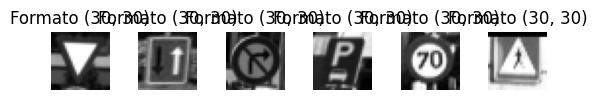

In [54]:
for i in range(len(rand_signs)):
    plt.subplot(1,6, i+1)
    plt.axis('off')
    plt.imshow(X[rand_signs[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)
    plt.title(
        "Formato {}".format(X[rand_signs[i]].shape)
    )

In [55]:
X[0]

array([[0.38619076, 0.53212631, 0.52153977, 0.51729642, 0.38314716,
        0.15523222, 0.16104498, 0.19269669, 0.21127823, 0.23722504,
        0.23146061, 0.21783937, 0.23028384, 0.38512056, 0.68504576,
        0.71591146, 0.65005295, 0.34927745, 0.25866925, 0.24995237,
        0.23417302, 0.24118843, 0.25457546, 0.21473317, 0.21245867,
        0.22835198, 0.27465032, 0.27853834, 0.26647321, 0.29519709],
       [0.39295272, 0.52964623, 0.50605367, 0.50084489, 0.37321004,
        0.15598481, 0.18175127, 0.21422013, 0.24616612, 0.25727802,
        0.23089264, 0.23614913, 0.26318827, 0.25165324, 0.38457391,
        0.49269349, 0.30579523, 0.23752863, 0.27009181, 0.2665293 ,
        0.24247967, 0.23368649, 0.23703516, 0.21465508, 0.20974151,
        0.23018071, 0.28661037, 0.3144494 , 0.29646932, 0.28609988],
       [0.41570915, 0.5480223 , 0.51006881, 0.50195141, 0.36228751,
        0.16151894, 0.18901115, 0.22000716, 0.23697827, 0.2314087 ,
        0.22161126, 0.24725701, 0.28823349, 0.

In [56]:
import tensorflow as tf

In [57]:
# modelo secuencial
model = tf.keras.models.Sequential()

In [59]:
# lo que hace es que pasa de un shape de (30, 30) a uno de (900)
model.add(tf.keras.layers.Flatten(input_shape=(30,30))) 

In [60]:
# fila de neuronas, con X neuronas y función de activación
model.add(tf.keras.layers.Dense(9, activation='sigmoid'))

In [61]:
model.add(tf.keras.layers.Dropout(0.2))

In [62]:
model.add(tf.keras.layers.Dense(62, activation='softmax'))

In [63]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [64]:
t_X = tf.constant(X)
t_y = tf.constant(y)

In [66]:
len(t_y)

4575

In [69]:
model.fit(t_X, t_y, epochs=50)

Epoch 1/50
143/143 [==============================] - 0s 668us/step - loss: 1.2460 - accuracy: 0.6101
Epoch 2/50
143/143 [==============================] - 0s 633us/step - loss: 1.2115 - accuracy: 0.6286
Epoch 3/50
143/143 [==============================] - 0s 625us/step - loss: 1.2570 - accuracy: 0.6164
Epoch 4/50
143/143 [==============================] - 0s 634us/step - loss: 1.2256 - accuracy: 0.6212
Epoch 5/50
143/143 [==============================] - 0s 624us/step - loss: 1.2318 - accuracy: 0.6184
Epoch 6/50
143/143 [==============================] - 0s 627us/step - loss: 1.2145 - accuracy: 0.6271
Epoch 7/50
143/143 [==============================] - 0s 620us/step - loss: 1.2325 - accuracy: 0.6203
Epoch 8/50
143/143 [==============================] - 0s 608us/step - loss: 1.2044 - accuracy: 0.6273
Epoch 9/50
143/143 [==============================] - 0s 634us/step - loss: 1.2206 - accuracy: 0.6230
Epoch 10/50
143/143 [==============================] - 0s 625us/step - loss: 1.195

In [78]:
model = tf.keras.models.Sequential(
[
    tf.keras.layers.Flatten(input_shape=(30,30)),
    tf.keras.layers.Dense(124, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [79]:
model.fit(t_X, t_y, epochs=50)

Epoch 1/50
143/143 [==============================] - 0s 824us/step - loss: 3.2970 - accuracy: 0.2404
Epoch 2/50
143/143 [==============================] - 0s 822us/step - loss: 2.4653 - accuracy: 0.4461
Epoch 3/50
143/143 [==============================] - 0s 837us/step - loss: 1.9677 - accuracy: 0.5416
Epoch 4/50
143/143 [==============================] - 0s 892us/step - loss: 1.6387 - accuracy: 0.6083
Epoch 5/50
143/143 [==============================] - 0s 847us/step - loss: 1.4097 - accuracy: 0.6588
Epoch 6/50
143/143 [==============================] - 0s 849us/step - loss: 1.2361 - accuracy: 0.7036
Epoch 7/50
143/143 [==============================] - 0s 883us/step - loss: 1.1106 - accuracy: 0.7244
Epoch 8/50
143/143 [==============================] - 0s 847us/step - loss: 1.0005 - accuracy: 0.7596
Epoch 9/50
143/143 [==============================] - 0s 863us/step - loss: 0.9066 - accuracy: 0.7790
Epoch 10/50
143/143 [==============================] - 0s 850us/step - loss: 0.833

In [81]:
X[0].shape

(30, 30)

In [82]:
#model.predict(tf.constant(X[0]))